## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
raw_data = pd.read_csv("C:\\Users\\rmshi\\Downloads\\1.04. Real-life example.csv")
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## Preprocessing

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = raw_data.drop(["Model"],axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Missing Values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the PDFs

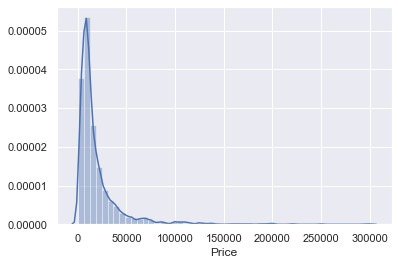

In [8]:
sns.distplot(data_no_mv["Price"])

## Dealing with outliers

In [9]:
q = data_no_mv["Price"].quantile(0.99)
data1 = data_no_mv[data_no_mv["Price"]<q]
data1

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [10]:
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


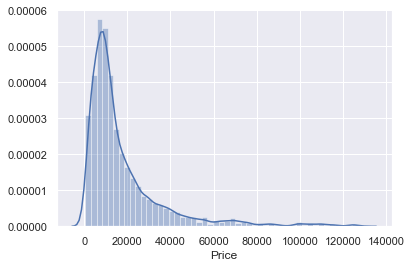

In [11]:
sns.distplot(data1["Price"])

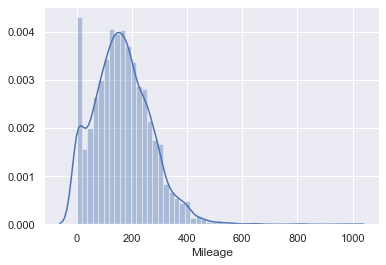

In [12]:
sns.distplot(data1["Mileage"])

In [13]:
data1["Mileage"].describe(include='all')

count    3984.000000
mean      165.116466
std       102.766126
min         0.000000
25%        93.000000
50%       160.000000
75%       230.000000
max       980.000000
Name: Mileage, dtype: float64

In [14]:
q1 = data1["Mileage"].quantile(0.99)
data2 = data1[data1["Mileage"]<q1]

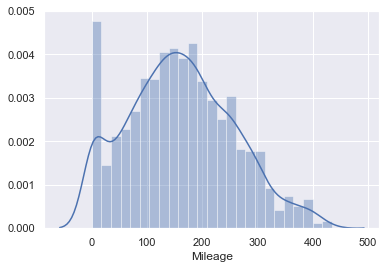

In [15]:
sns.distplot(data2["Mileage"])

In [16]:
data2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


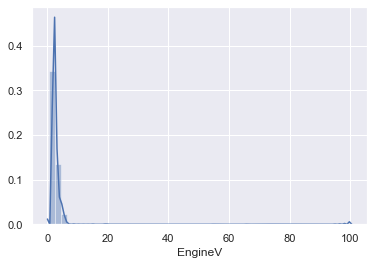

In [17]:
sns.distplot(data2["EngineV"])

In [18]:
data3 = data2[data2["EngineV"]<6.5]

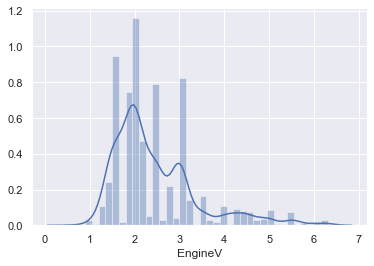

In [19]:
sns.distplot(data3["EngineV"])

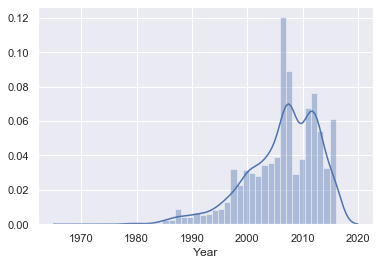

In [20]:
sns.distplot(data3["Year"])

In [21]:
q3 = data3["Year"].quantile(0.01)
data4 = data3[data3["Year"]>q3]

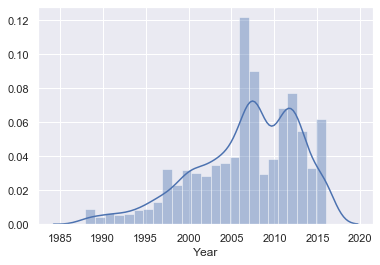

In [22]:
sns.distplot(data4["Year"])

In [23]:
data_cleaned = data4.reset_index(drop = True)

In [24]:
data_cleaned.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


# Checking OLS assumptions

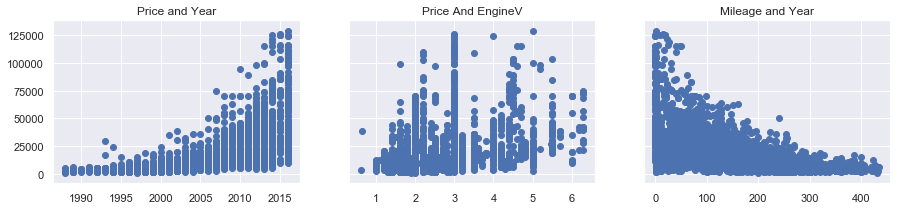

In [36]:
f,(ax1, ax2, ax3) = plt.subplots(1,3,sharey = True,figsize=(15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"],data_cleaned["Price"])
ax2.set_title("Price And EngineV")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["Price"])
ax3.set_title("Mileage and Year")

plt.show()


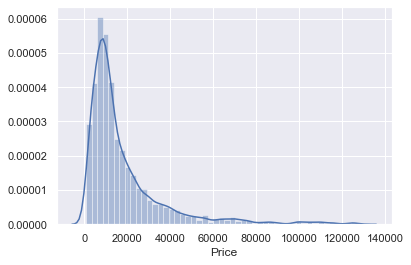

In [95]:
sns.distplot(data_cleaned["Price"])

##  Relaxing the assumptions

In [96]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"] = log_price

In [97]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


In [98]:
data_cleaned.drop(["Price"],axis = 1)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


## Multicollinearity

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage","Year","EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [100]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [101]:
data_no_multicollinearity = data_cleaned.drop(["Year"], axis= 1)

In [102]:
data_no_multicollinearity

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


## Create Dummy Variables

In [103]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [104]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Rearrange a bit

In [105]:
data_with_dummies.drop(["Price"],axis = 1,inplace = True)

In [106]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [107]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [108]:
data_preprocessed = data_with_dummies[cols]

In [109]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear Regression

##  Declare the inputs and targets

In [110]:
targets = data_preprocessed["log_price"]
inputs = data_preprocessed.drop(["log_price"],axis = 1)

## Scale the data

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [112]:
inputs_scaled = scaler.transform(inputs)

## Train Test Split

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,targets, test_size = 0.2 , random_state = 365)

## create regression

In [114]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
y_hat = reg.predict(x_train)

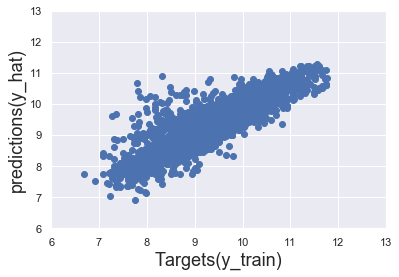

In [116]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)',size = 18)
plt.ylabel('predictions(y_hat)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

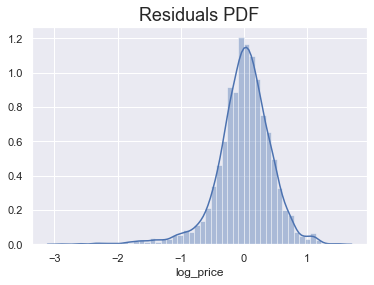

In [117]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size = 18)

In [118]:
reg.score(x_train,y_train)

0.744996578792662

## finding the weights and bias

In [119]:
reg.intercept_

9.415239458021297

In [120]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [121]:
reg_summery = pd.DataFrame(inputs.columns.values,columns = ["Features"])
reg_summery["Weights"] = reg.coef_
reg_summery

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


## Testing

In [122]:
y_hat_test = reg.predict(x_test)

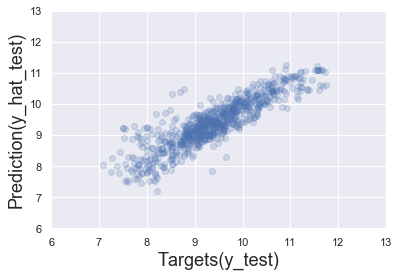

In [123]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel("Targets(y_test)", size = 18)
plt.ylabel("Prediction(y_hat_test)",size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [124]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Predictions"])
df_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [125]:
y_test = y_test.reset_index(drop = True)

In [126]:
df_pf["Target"] = np.exp(y_test)

In [127]:
df_pf

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [128]:
df_pf["Residuals"] = df_pf["Predictions"] - df_pf["Target"]

In [129]:
df_pf["Diffrence %"] = np.absolute(df_pf["Residuals"]/df_pf["Target"]*100)

In [130]:
df_pf.describe()

,Predictions,Target,Residuals,Diffrence %
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,-2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-85106.162329,0.062794
25%,7413.644234,6900.000000,-3147.343497,12.108022
50%,11568.168859,11600.000000,-142.518577,23.467728
75%,20162.408805,20500.000000,2044.191251,39.563570
max,77403.055224,126000.000000,29456.498331,512.688080


In [134]:
pd.options.display.max_rows = 999
df_pf.sort_values(by = ["Diffrence %"])

,Predictions,Target,Residuals,Diffrence %
698,30480.847838,30500.00,-19.152162,0.062794
742,16960.310476,16999.00,-38.689524,0.227599
60,12469.207487,12500.00,-30.792513,0.246340
110,25614.137960,25500.00,114.137960,0.447600
367,42703.676996,42500.00,203.676996,0.479240
369,3084.687839,3100.00,-15.312161,0.493941
769,29651.726363,29500.00,151.726363,0.514327
272,9749.525108,9800.00,-50.474892,0.515050
714,23118.072456,22999.00,119.072456,0.517729
630,8734.578436,8800.00,-65.421564,0.743427


on average the model is pretty decent at predicting the price